In [77]:
import numpy as np
import pandas as pd
import xarray as xr

# Datei einlesen
P_file_path = 'N:/gebhyd/3_Hyv/Diplomanden/2_Running/L_Nuesch/40km2/gridout_lv03_40_P_full.dat'

data = []
station_ids = []
dates = []

with open(P_file_path, 'r') as file:
    lines = file.readlines()

# Verarbeiten der Datenzeilen
for line in lines:
    parts = line.strip().split()

    try:
        # Erste Spalte: Laufende Nummer oder ID (überspringen)
        _ = parts[0]

        # Zweite Spalte: Dateipfad, Datum extrahieren
        P_file_path = parts[1]
        date_str = P_file_path.split('/')[-1].split('Mob500')[1].split('.P.gz')[0]
        date = pd.to_datetime(date_str, format='%Y%m%d')

        # Ab der dritten Spalte: Niederschlagswerte
        precipitation_values = list(map(float, parts[2:]))

        # Daten sammeln
        dates.append(date)
        data.append(precipitation_values)

    except Exception as e:
        print(f"Fehler beim Verarbeiten der Zeile: {line.strip()} - {e}")

# Stations-IDs generieren
station_ids = [f"V{i+1}" for i in range(len(data[0]))]

# Konvertieren zu einem xarray Dataset
try:
    nday = np.array(dates, dtype='datetime64')
    data_array = np.array(data)

    # Erstellen des xarray Dataset
    P_prevah = xr.Dataset(
        {
            'precipitation': (['nday', 'ID'], data_array)
        },
        coords={
            'nday': nday,
            'ID': station_ids
        }
    )

    # Dataset anzeigen
    print(P_prevah)

    # Optional: Dataset speichern
    # dataset.to_netcdf('output.nc')

except Exception as e:
    print(f"Fehler beim Erstellen des xarray Dataset: {e}")

Fehler beim Verarbeiten der Zeile: V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 V61 V62 V63 V64 V65 V66 V67 V68 V69 V70 V71 V72 V73 V74 V75 V76 V77 V78 V79 V80 V81 V82 V83 V84 V85 V86 V87 V88 V89 V90 V91 V92 V93 V94 V95 V96 V97 V98 V99 V100 V101 V102 V103 V104 V105 V106 V107 V108 V109 V110 V111 V112 V113 V114 V115 V116 V117 V118 V119 V120 V121 V122 V123 V124 V125 V126 V127 V128 V129 V130 V131 V132 V133 V134 V135 V136 V137 V138 V139 V140 V141 V142 V143 V144 V145 V146 V147 V148 V149 V150 V151 V152 V153 V154 V155 V156 V157 V158 V159 V160 V161 V162 V163 V164 V165 V166 V167 V168 V169 V170 V171 V172 V173 V174 V175 V176 V177 V178 V179 V180 V181 V182 V183 V184 V185 V186 V187 V188 V189 V190 V191 V192 V193 V194 V195 V196 V197 V198 V199 V200 V201 V202 V203 V204 V205 V206 V207 V208 V209 V210 V211 V212 V213 V214 V21

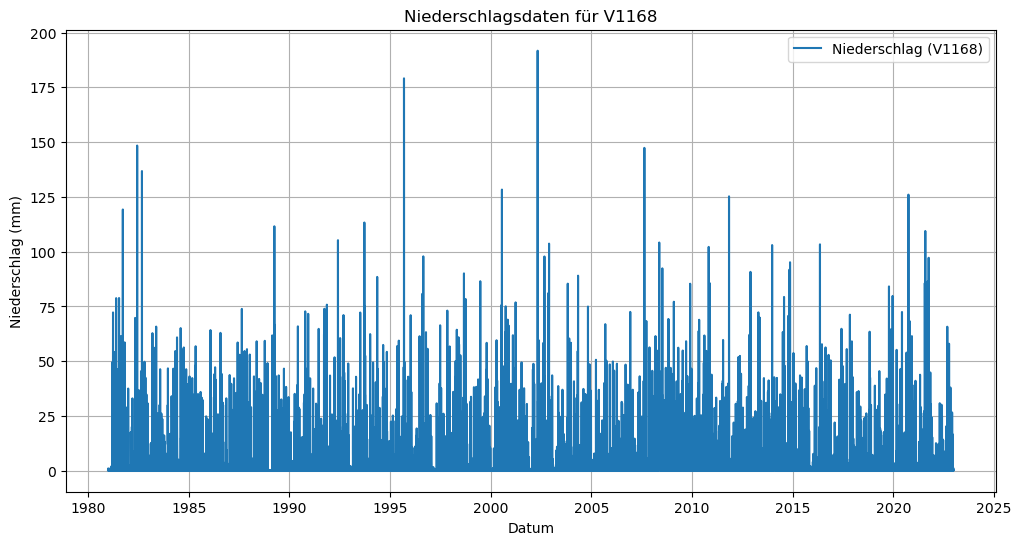

In [78]:
import matplotlib.pyplot as plt

# Überprüfen, ob V1168 in den Stations-IDs existiert
station_id = "V1168"
if station_id not in P_prevah["ID"].values:
    print(f"{station_id} nicht in den verfügbaren Stations-IDs.")
else:
    # Daten von V1168 extrahieren
    precipitation_data = P_prevah["precipitation"].sel(ID=station_id)

    # Plot erstellen
    plt.figure(figsize=(12, 6))
    plt.plot(P_prevah["nday"].values, precipitation_data.values, label=f"Niederschlag ({station_id})")
    plt.xlabel("Datum")
    plt.ylabel("Niederschlag (mm)")
    plt.title(f"Niederschlagsdaten für {station_id}")
    plt.legend()
    plt.grid()
    plt.show()



In [79]:
import numpy as np
import pandas as pd
import xarray as xr

# Datei einlesen
Q_file_path = 'N:/gebhyd/3_Hyv/Diplomanden/2_Running/L_Nuesch/40km2/gridout_lv03_40_RGS_full.dat'

data = []
station_ids = []
dates = []

with open(Q_file_path, 'r') as file:
    lines = file.readlines()

# Verarbeiten der Datenzeilen
for line in lines:
    parts = line.strip().split()

    try:
        # Erste Spalte: Laufende Nummer oder ID (überspringen)
        _ = parts[0]

        # Zweite Spalte: Dateipfad, Datum extrahieren
        P_file_path = parts[1]
        date_str = P_file_path.split('/')[-1].split('Mob500')[1].split('.RGS.gz')[0]
        date = pd.to_datetime(date_str, format='%Y%m%d')

        # Ab der dritten Spalte: Niederschlagswerte
        streamflow_values = list(map(float, parts[2:]))

        # Daten sammeln
        dates.append(date)
        data.append(streamflow_values)

    except Exception as e:
        print(f"Fehler beim Verarbeiten der Zeile: {line.strip()} - {e}")

# Stations-IDs generieren
station_ids = [f"V{i+1}" for i in range(len(data[0]))]

# Konvertieren zu einem xarray Dataset
try:
    nday = np.array(dates, dtype='datetime64')
    data_array = np.array(data)

    # Erstellen des xarray Dataset
    Q_prevah = xr.Dataset(
        {
            'flow': (['nday', 'ID'], data_array)
        },
        coords={
            'nday': nday,
            'ID': station_ids
        }
    )

    # Dataset anzeigen
    print(Q_prevah)

    # Optional: Dataset speichern
    # dataset.to_netcdf('output.nc')

except Exception as e:
    print(f"Fehler beim Erstellen des xarray Dataset: {e}")

Fehler beim Verarbeiten der Zeile: V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 V61 V62 V63 V64 V65 V66 V67 V68 V69 V70 V71 V72 V73 V74 V75 V76 V77 V78 V79 V80 V81 V82 V83 V84 V85 V86 V87 V88 V89 V90 V91 V92 V93 V94 V95 V96 V97 V98 V99 V100 V101 V102 V103 V104 V105 V106 V107 V108 V109 V110 V111 V112 V113 V114 V115 V116 V117 V118 V119 V120 V121 V122 V123 V124 V125 V126 V127 V128 V129 V130 V131 V132 V133 V134 V135 V136 V137 V138 V139 V140 V141 V142 V143 V144 V145 V146 V147 V148 V149 V150 V151 V152 V153 V154 V155 V156 V157 V158 V159 V160 V161 V162 V163 V164 V165 V166 V167 V168 V169 V170 V171 V172 V173 V174 V175 V176 V177 V178 V179 V180 V181 V182 V183 V184 V185 V186 V187 V188 V189 V190 V191 V192 V193 V194 V195 V196 V197 V198 V199 V200 V201 V202 V203 V204 V205 V206 V207 V208 V209 V210 V211 V212 V213 V214 V21

In [80]:
import numpy as np
import pandas as pd
import xarray as xr

# Datei einlesen
SWE_file_path = 'N:/gebhyd/3_Hyv/Diplomanden/2_Running/L_Nuesch/40km2/gridout_lv03_40_SSO_full.dat'

data = []
station_ids = []
dates = []

with open(SWE_file_path, 'r') as file:
    lines = file.readlines()

# Verarbeiten der Datenzeilen
for line in lines:
    parts = line.strip().split()

    try:
        # Erste Spalte: Laufende Nummer oder ID (überspringen)
        _ = parts[0]

        # Zweite Spalte: Dateipfad, Datum extrahieren
        SWE_file_path = parts[1]
        date_str = SWE_file_path.split('/')[-1].split('Mob500')[1].split('.SSO.gz')[0]
        date = pd.to_datetime(date_str, format='%Y%m%d')

        # Ab der dritten Spalte: Niederschlagswerte
        swe_values = list(map(float, parts[2:]))

        # Daten sammeln
        dates.append(date)
        data.append(swe_values)

    except Exception as e:
        print(f"Fehler beim Verarbeiten der Zeile: {line.strip()} - {e}")

# Stations-IDs generieren
station_ids = [f"V{i+1}" for i in range(len(data[0]))]

# Konvertieren zu einem xarray Dataset
try:
    nday = np.array(dates, dtype='datetime64')
    data_array = np.array(data)

    # Erstellen des xarray Dataset
    SWE_prevah = xr.Dataset(
        {
            'swe': (['nday', 'ID'], data_array)
        },
        coords={
            'nday': nday,
            'ID': station_ids
        }
    )

    # Dataset anzeigen
    print(SWE_prevah)

    # Optional: Dataset speichern
    # dataset.to_netcdf('output.nc')

except Exception as e:
    print(f"Fehler beim Erstellen des xarray Dataset: {e}")

Fehler beim Verarbeiten der Zeile: V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19 V20 V21 V22 V23 V24 V25 V26 V27 V28 V29 V30 V31 V32 V33 V34 V35 V36 V37 V38 V39 V40 V41 V42 V43 V44 V45 V46 V47 V48 V49 V50 V51 V52 V53 V54 V55 V56 V57 V58 V59 V60 V61 V62 V63 V64 V65 V66 V67 V68 V69 V70 V71 V72 V73 V74 V75 V76 V77 V78 V79 V80 V81 V82 V83 V84 V85 V86 V87 V88 V89 V90 V91 V92 V93 V94 V95 V96 V97 V98 V99 V100 V101 V102 V103 V104 V105 V106 V107 V108 V109 V110 V111 V112 V113 V114 V115 V116 V117 V118 V119 V120 V121 V122 V123 V124 V125 V126 V127 V128 V129 V130 V131 V132 V133 V134 V135 V136 V137 V138 V139 V140 V141 V142 V143 V144 V145 V146 V147 V148 V149 V150 V151 V152 V153 V154 V155 V156 V157 V158 V159 V160 V161 V162 V163 V164 V165 V166 V167 V168 V169 V170 V171 V172 V173 V174 V175 V176 V177 V178 V179 V180 V181 V182 V183 V184 V185 V186 V187 V188 V189 V190 V191 V192 V193 V194 V195 V196 V197 V198 V199 V200 V201 V202 V203 V204 V205 V206 V207 V208 V209 V210 V211 V212 V213 V214 V21

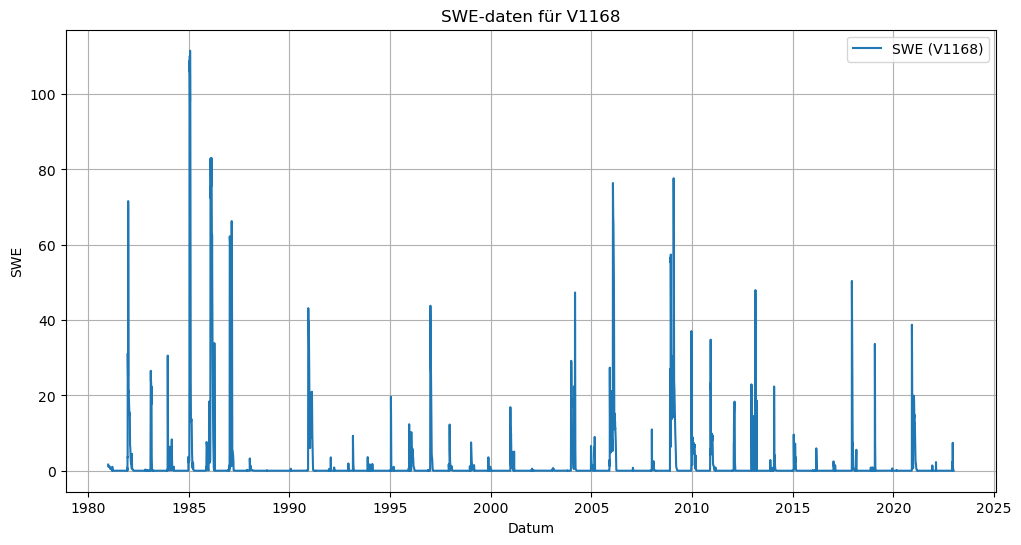

In [81]:
# Überprüfen, ob V1168 in den Stations-IDs existiert
station_id = "V1168"
if station_id not in SWE_prevah["ID"].values:
    print(f"{station_id} nicht in den verfügbaren Stations-IDs.")
else:
    # Daten von V1168 extrahieren
    swe_data = SWE_prevah["swe"].sel(ID=station_id)

    # Plot erstellen
    plt.figure(figsize=(12, 6))
    plt.plot(SWE_prevah["nday"].values, swe_data.values, label=f"SWE ({station_id})")
    plt.xlabel("Datum")
    plt.ylabel("SWE")
    plt.title(f"SWE-daten für {station_id}")
    plt.legend()
    plt.grid()
    plt.show()

In [82]:
import geopandas as gpd

# Pfad zur Shapefile-Datei
shapefile_path = "N:/gebhyd/3_Hyv/Diplomanden/2_Running/L_Nuesch/40km2/ebene_40km.shp"

# Shapefile laden
gdf = gpd.read_file(shapefile_path)

# Neue ID-Spalte hinzufügen (V1, V2, ..., Vn)
gdf["ID"] = [f"V{i+1}" for i in range(len(gdf))]

# Ergebnis überprüfen
print(gdf.head())

# Koordinaten des Zentroids berechnen
gdf["lon"] = gdf.geometry.centroid.x  # Longitude
gdf["lat"] = gdf.geometry.centroid.y  # Latitude

# Ergebnis überprüfen
print(gdf[["ID", "lon", "lat"]].head())

# Geändertes Shapefile speichern
output_path = "N:/gebhyd/3_Hyv/Diplomanden/2_Running/L_Nuesch/40km2/ebene_40km_with_ids.shp"
gdf.to_file(output_path)

print(f"Das Shapefile mit den neuen IDs wurde gespeichert unter: {output_path}")


   tezgnr40    Shape_Leng    Shape_Area  teilezgfla  \
0    100004  29360.532922  2.086376e+07       20.90   
1    100005  16374.828970  9.000388e+06        9.00   
2    100007  20486.769326  8.265382e+06        8.27   
3    100010  57366.272226  3.129718e+07       31.30   
4    100011  28924.124155  3.775566e+07       37.80   

                                            geometry  ID  
0  POLYGON Z ((2510391.628 1153569.949 0.000, 251...  V1  
1  POLYGON Z ((2803251.813 1183459.995 0.000, 280...  V2  
2  POLYGON Z ((2632987.615 1172927.615 0.000, 263...  V3  
3  MULTIPOLYGON Z (((2570812.342 1215072.342 0.00...  V4  
4  POLYGON Z ((2747423.022 1168985.144 0.000, 274...  V5  
   ID           lon           lat
0  V1  2.511065e+06  1.151361e+06
1  V2  2.803190e+06  1.181862e+06
2  V3  2.632283e+06  1.170901e+06
3  V4  2.576863e+06  1.216274e+06
4  V5  2.747332e+06  1.165284e+06
Das Shapefile mit den neuen IDs wurde gespeichert unter: N:/gebhyd/3_Hyv/Diplomanden/2_Running/L_Nuesch/40km2/e

In [83]:
# oberes zuerst laufen lassen

# GeoDataFrame (gdf) vorbereiten
# Angenommen, gdf hat Spalten: "ID", "lon", "lat"
# Stellen Sie sicher, dass die IDs im gleichen Format wie im xarray vorliegen
gdf = gdf.set_index("ID")  # Setzt "ID" als Index für den Zugriff

# xarray (Q_prevah) laden
# Angenommen, Q_prevah ist bereits definiert und enthält die gleiche "ID"-Koordinate
lon_values = gdf.loc[Q_prevah["ID"].values, "lon"].values
lat_values = gdf.loc[Q_prevah["ID"].values, "lat"].values

# Hinzufügen von lon und lat als Koordinaten zu Q_prevah
Q_prevah = Q_prevah.assign_coords(
    lon=("ID", lon_values),
    lat=("ID", lat_values)
)
# Hinzufügen von lon und lat als Koordinaten zu Q_prevah
P_prevah = P_prevah.assign_coords(
    lon=("ID", lon_values),
    lat=("ID", lat_values)
)
# Hinzufügen von lon und lat als Koordinaten zu Q_prevah
SWE_prevah = SWE_prevah.assign_coords(
    lon=("ID", lon_values),
    lat=("ID", lat_values)
)
# Ergebnis überprüfen
print(Q_prevah)
print(P_prevah)
print(SWE_prevah)
print(Q_prevah.sel(ID='V2'))


<xarray.Dataset>
Dimensions:  (ID: 1170, nday: 15340)
Coordinates:
  * nday     (nday) datetime64[ns] 1981-01-01 1981-01-02 ... 2022-12-31
  * ID       (ID) <U5 'V1' 'V2' 'V3' 'V4' ... 'V1167' 'V1168' 'V1169' 'V1170'
    lon      (ID) float64 2.511e+06 2.803e+06 2.632e+06 ... 2.537e+06 2.496e+06
    lat      (ID) float64 1.151e+06 1.182e+06 1.171e+06 ... 1.179e+06 1.143e+06
Data variables:
    flow     (nday, ID) float64 2.543 0.414 0.714 1.188 ... 0.994 2.327 8.672
<xarray.Dataset>
Dimensions:        (ID: 1170, nday: 15340)
Coordinates:
  * nday           (nday) datetime64[ns] 1981-01-01 1981-01-02 ... 2022-12-31
  * ID             (ID) <U5 'V1' 'V2' 'V3' 'V4' ... 'V1168' 'V1169' 'V1170'
    lon            (ID) float64 2.511e+06 2.803e+06 ... 2.537e+06 2.496e+06
    lat            (ID) float64 1.151e+06 1.182e+06 ... 1.179e+06 1.143e+06
Data variables:
    precipitation  (nday, ID) float64 2.27 3.715 0.841 ... 0.895 0.035 0.057
<xarray.Dataset>
Dimensions:  (ID: 1170, nday: 15340)
Coo

In [84]:
qobs_path = "C:/Users/lauri/PycharmProjects/FROSTBYTE/CH_data/CH_input_data/Qobs_Camels.nc"
p_path = "C:/Users/lauri/PycharmProjects/FROSTBYTE/CH_data/CH_input_data/P_Camels.nc"
swe_path = "C:/Users/lauri/PycharmProjects/FROSTBYTE/CH_data/CH_input_data/SWE_Camels.nc"
# Load the .nc files as xarray datasets

Qobs_Camels = xr.open_dataset(qobs_path)
P_Camels = xr.open_dataset(p_path)
SWE_Camels = xr.open_dataset(swe_path)

# Print the datasets to inspect their structure
print("Qobs_Camels:")
print(Qobs_Camels)

print("\nP_Camels:")
print(P_Camels)

print("\nSWE_Camels:")
print(SWE_Camels)


Qobs_Camels:
<xarray.Dataset>
Dimensions:     (Station_ID: 331, time: 14610)
Coordinates:
    lat         (Station_ID) float64 ...
  * Station_ID  (Station_ID) object '2004' '2007' '2009' ... '6010' '6011'
  * time        (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2020-12-31
    lon         (Station_ID) float64 ...
    source      (Station_ID) object ...
Data variables:
    Flow        (time, Station_ID) float64 ...

P_Camels:
<xarray.Dataset>
Dimensions:        (lle: 3, nday: 14610, station: 331)
Coordinates:
  * station        (station) object '2004' '2007' '2009' ... '6010' '6011'
  * nday           (nday) datetime64[ns] 1981-01-01 1981-01-02 ... 2020-12-31
  * lle            (lle) object 'lon' 'lat' 'elev'
Data variables:
    LLE            (station, lle) float64 ...
    precipitation  (nday, station) float64 ...

SWE_Camels:
<xarray.Dataset>
Dimensions:          (station_id: 331, time: 14610)
Coordinates:
    Station_ID       (station_id) object ...
  * time             (time

In [88]:
Q_prevah = Q_prevah.rename({"ID": "Station_ID", "nday": "time", "flow": "Flow"})
#P_prevah = P_prevah.rename({"ID": "station"})
#SWE_prevah = SWE_prevah.rename({"ID": "Station`_ID", "nday": "time"})
#SWE_prevah = SWE_prevah.rename({"Station`_ID": "Station_ID"})
print(Q_prevah)
print(P_prevah)

<xarray.Dataset>
Dimensions:     (Station_ID: 1170, time: 15340)
Coordinates:
  * time        (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2022-12-31
  * Station_ID  (Station_ID) <U5 'V1' 'V2' 'V3' 'V4' ... 'V1168' 'V1169' 'V1170'
    lon         (Station_ID) float64 2.511e+06 2.803e+06 ... 2.537e+06 2.496e+06
    lat         (Station_ID) float64 1.151e+06 1.182e+06 ... 1.179e+06 1.143e+06
Data variables:
    Flow        (time, Station_ID) float64 2.543 0.414 0.714 ... 2.327 8.672
<xarray.Dataset>
Dimensions:        (ID: 1170, lle: 3, nday: 15340, station: 1170)
Coordinates:
  * nday           (nday) datetime64[ns] 1981-01-01 1981-01-02 ... 2022-12-31
  * ID             (ID) <U5 'V1' 'V2' 'V3' 'V4' ... 'V1168' 'V1169' 'V1170'
  * lle            (lle) <U4 'lon' 'lat' 'elev'
Dimensions without coordinates: station
Data variables:
    precipitation  (nday, ID) float64 2.27 3.715 0.841 ... 0.895 0.035 0.057
    LLE            (station, lle) float64 2.511e+06 1.151e+06 ... 1.143e+06 nan


In [86]:
import numpy as np

# Combine lon, lat, and elev into an array
lon_values = P_prevah["lon"].values
lat_values = P_prevah["lat"].values
elev_values = np.full_like(lon_values, np.nan)  # Fill elevation with NaN
lle_values = np.stack([lon_values, lat_values, elev_values], axis=-1)

# Rename dimensions to avoid conflicts
P_prevah = P_prevah.assign_coords(lle=["lon", "lat", "elev"])  # Rename LLE to LLE_dim

# Assign the new LLE variable
P_prevah = P_prevah.assign(
    LLE=(["station", "lle"], lle_values)
)

# Drop the original lon and lat coordinates
P_prevah = P_prevah.drop_vars(["lon", "lat"])

# Verify the updated dataset
print(P_prevah)

<xarray.Dataset>
Dimensions:        (ID: 1170, lle: 3, nday: 15340, station: 1170)
Coordinates:
  * nday           (nday) datetime64[ns] 1981-01-01 1981-01-02 ... 2022-12-31
  * ID             (ID) <U5 'V1' 'V2' 'V3' 'V4' ... 'V1168' 'V1169' 'V1170'
  * lle            (lle) <U4 'lon' 'lat' 'elev'
Dimensions without coordinates: station
Data variables:
    precipitation  (nday, ID) float64 2.27 3.715 0.841 ... 0.895 0.035 0.057
    LLE            (station, lle) float64 2.511e+06 1.151e+06 ... 1.143e+06 nan


In [93]:
P_prevah.to_netcdf("../PREVAH/input_data/P_prevah.nc")
Q_prevah.to_netcdf("../PREVAH/input_data/Q_prevah.nc")


SWE_prevah.to_netcdf("../PREVAH/input_data/SWE_prevah.nc")